# Clustering: Gaussian Mixed Mixture (GMM)

🎯 **Goal**

We want to **approximate the distribution of the data as a mixture of two Gaussians (K = 2).**  
Instead of saying "this point is in cluster 1", we say this point **probably** came from _Gaussian1_ with probability $\gamma$...  

We'll use the **Expectation-Maximization (EM)** algorithm to learn the model.  

The dataset:  

| Point | Coordinates |
| ----- | ----------- |
| A     | (1, 1)      |
| B     | (2, 1)      |
| C     | (4, 3)      |
| D     | (5, 4)      |
| E     | (3, 4)      |

📌 **Step 1: Initialization of parameters**  

**We assume the data comes from a mixture of 2 Gaussian components (K = 2)**. We initialize:  

* Means $(\mu)$  

$\mu_1 = (1, 1), \mu_2 = (5, 4) \leftarrow$ based on points A and D.   

* Covariance $(\Sigma)$  

$\Sigma_1 = \Sigma_2 = $ identity matrix (simplified asumption)  

* Mixing weight $(\pi)$ equal priors:  

$\pi_1 = 0.5, \pi_2 = 0.5$.  

🔄 **Step 2: E-step (Expectation)**  

For each point $x_i$, compute the **responsibility** $\gamma_{i_k}$, which is the **posterior probability** that the point $i$ belongs to cluster $k$ given the current parameters $\pi_k, \mu_k, \Sigma_k$:  

$$\gamma_{ik} = P(z_i=k | x_i)$$  

$$\gamma_{ik} = \dfrac{\pi_k.N(x_i | \mu_k, \Sigma_k)}{\Sigma_{j=1}^K\pi_i.N(x_i | \mu_j, \Sigma_j)}$$  

Where $N(x_i | \mu_k, \Sigma_k)$ is the multivariate Gaussian likelihood of $x_i$ under cluster $k$ and given by $\dfrac{1}{(2\pi)^{d/2}|\Sigma_k|^{1/2}}.exp(-\dfrac{1}{2} (x_i - \mu_j)^T\Sigma_k^{-1}(x_i - \mu_j))$ with $d$ the dimensionality of $x_i$.  

<u> Example: compute for the Point $B:(2,1)$:</u>   
* $\|\ B - \mu_1 \|\ ^2 = (2-1)^2 + (1-1)^2 = 1$
* $\|\ B - \mu_2 \|\ ^2 = (2-5)^2 + (1-4)^2 = 9 + 9 = 18$  
Then:  
$\gamma_{B,1} = \dfrac{exp(-\dfrac{1}{2} \times 1)}{exp(-\dfrac{1}{2} \times 1) + exp(-\dfrac{1}{2} \times 18)} \approx \dfrac{0.607}{0.607 + 0.0001} \approx 0.607 > 0.5$  

So in the table: $B \rightarrow (\gamma_1 \approx 0.61, \gamma_2 \approx 0.39)$

After computing responsibilities (approximate values):  


| Point | γ (Cluster 1) | γ (Cluster 2) |
| ----- | ------------- | ------------- |
| A     | \~1.00        | \~0.00        |
| B     | \~0.67        | \~0.39        |
| C     | \~0.30        | \~0.70        |
| D     | \~0.00        | \~1.00        |
| E     | \~0.10        | \~0.90        |
  
(Simplified values based on proximity to cluster means).  

This E-step gives **soft assignment** (probabilities).  
E-step uses the current parameters - it doesn't improve them. It just tells you, given the current model, what the likely cluster memberships are.
That’s not enough. Your goal is to fit the best model to the data - and that means improving the parameters (M-step).

📈 **Step 3: M-step (Maximization)**.  

Now update the parameters based on the responsibilities (probabilities) of the E-step:  

**Context:**  
In soft clustering (as in GMM), each data point belongs partially to all clusters, 
with a degree of membership given by the responsibility $\gamma_{ik}$. So, instead of counting how many points are assigned to a cluster (as in K-means), we sum the partial responsibilities of each point for that cluster ($N_k = \sum_{i=1}^N\gamma_{ik}$).  

* Updated means:  

$$\mu_k = \dfrac{\sum_{i=1}^N\gamma_{ik}.x_i}{\sum_{i=1}^N\gamma_{ik}} = \dfrac{\sum_{i=1}^N\gamma_{ik}.x_i}{N_k}$$  

* Updated covariances:

$$\Sigma_k = \dfrac{\sum_{i=1}^N\gamma_{ik}.(x_i - \mu_k)(x_i - \mu_k)^T}{\sum_{i=1}^N\gamma_{ik}} = \dfrac{\sum_{i=1}^N\gamma_{ik}.(x_i - \mu_k)(x_i - \mu_k)^T}{N_k}$$  

* Updated mixing weights (priors):

$$\pi_k = \dfrac{1}{N}\sum_{i=1}^N\gamma_{ik} = \dfrac{N_k}{N}$$

Example: updating $\mu_1$  

$\mu_1 = \dfrac{1 \times A + 0.67 \times B + 0.3 \times C + 0 \times D + 0.1 \times E}{1 + 0.67 + 0.3 + 0 + 0.1}$

This new mean will shift slightly toward $B$ and $C$.  


🔁 **Step 4: Iterate E-step and M-step**  

Repeat steps 2 and 3 until convergence (i.e., the parameters change become very little between iterations).  

With each iteration:  
* The responsibilities become sharper (closer to 0 or 1).  
* The means settle into two natural centers.  
* The weights $\pi_1$ and $\pi_2$ reflect the size of each cluster.  

✅ **Step 5: Final Cluster Assignment**  

After convergence, we can:  
* Keep the responsibilities for soft clustering, or  
* Assign each point to the cluster with the highest γ (hard clustering)  

| Point | Assigned Cluster (argmax γ) |
| ----- | --------------------------- |
| A     | 1                           |
| B     | 1                           |
| C     | 2                           |
| D     | 2                           |
| E     | 2                           |

$\rightarrow$ This matches the intuitive groupings: (A, B) vs. (C, D, E).  


📌 **Summary of GMM (EM Algorithm)**  


| Step   | Description                                      |
| ------ | ------------------------------------------------ |
| Init   | Choose initial values for $\mu_k$, $\Sigma_k$, and $\pi_k$     |
| E-step | Compute responsibilities $\gamma_{ik}$ for all data points |
| M-step | Update the parameters using the responsibilities |
| Repeat | Until convergence of parameters                  |
| Output | Use soft or hard assignments to define clusters  |


## Example with basic Python codes

📌 **Step 1: Initialization of parameters** 

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
X = np.array([[1,1] , [2,1], [4,3], [5,4], [3,4]])
print(X)

# for reproducibility
np.random.seed(4)

# number of clusters
K = 2

# randomly initialize the means by selecting K random points from the dataset
indices = np.random.choice(len(X), size=K, replace=False)
mu = X[indices].copy()  # shape (2, 4)
print("Initial means:")
mu1 = mu[:1]
print(f"mu1 : {mu1}")
mu2 = mu[1:]
print(f"mu2 : {mu2}")

# covariance matrices (identity matrices for simplicity)
print("Initial covariance matrix:")
cov1 = cov2 = np.eye(X.shape[1])
print(cov1)

pi1 = pi2 = .5  # equal priors for both clusters
print("Initial weights (priors):")
print(f"pi1 : {pi1}")
print(f"pi2 : {pi2}")

[[1 1]
 [2 1]
 [4 3]
 [5 4]
 [3 4]]
Initial means:
mu1 : [[1 1]]
mu2 : [[5 4]]
Initial covariance matrix:
[[1. 0.]
 [0. 1.]]
Initial weights (priors):
pi1 : 0.5
pi2 : 0.5


🔄 **Step 2: E-step (Expectation)**  

In [90]:
# E-step: calculate responsibilities
from scipy.stats import multivariate_normal

# Define the Gaussians
rv1 = multivariate_normal(mean=mu1.flatten(), cov=cov1)
rv2 = multivariate_normal(mean=mu2.flatten(), cov=cov2)

gammas = []  # list to store responsibilities

for x in X:
    # Compute likelihood under each Gaussian
    p1 = pi1 * rv1.pdf(x) # = joint proba to observe x and x is in the cluster 1 = prior × likelihood = responsibility numerator for cluster 1
    p2 = pi2 * rv2.pdf(x) # = joint proba to observe x and x is in the cluster 2 = prior × likelihood = responsibility numerator for cluster 2
    
    # Normalize to get gamma (posterior probability for cluster 1)
    gamma1 = p1 / (p1 + p2) # if gamma1 is above 0.5, then x is more likely to belong to cluster 1
    gamma2 = 1 - gamma1
    gammas.append([gamma1, gamma2])

# Convert to array for easier inspection
gammas = np.array(gammas)

# Show results
df = pd.DataFrame(gammas, columns=["Gamma (Cluster 1)", "Gamma (Cluster 2)"])
df.insert(0, "Point", [f"X{i}" for i in range(1, len(X)+1)])
print(df)
# Extra: two ways to calculate the probability of a point belonging to cluster 1 P(x_i | C_1))
# 1. Using the formula for multivariate Gaussian distribution
prob1 = (1 / np.sqrt((2 * np.pi) ** X.shape[1] * np.linalg.det(cov1))) * \
    np.exp(-0.5 * np.sum((X - mu1) @ np.linalg.inv(cov1) * (X - mu1), axis=1))
print(f"Probability for cluster 1: {prob1}")

# 2. Using scipy's multivariate_normal for the same calculation
from scipy.stats import multivariate_normal
rv1 = multivariate_normal(mean=mu1.flatten(), cov=cov1)
prob1 = rv1.pdf(X)
print(f"Probability for cluster 1: {prob1}")

  Point  Gamma (Cluster 1)  Gamma (Cluster 2)
0    X1           0.999996           0.000004
1    X2           0.999797           0.000203
2    X3           0.004070           0.995930
3    X4           0.000004           0.999996
4    X5           0.010987           0.989013
Probability for cluster 1: [1.59154943e-01 9.65323526e-02 2.39279779e-04 5.93115274e-07
 2.39279779e-04]
Probability for cluster 1: [1.59154943e-01 9.65323526e-02 2.39279779e-04 5.93115274e-07
 2.39279779e-04]


🔁 **Step 3: M-step (Maximization)**  

In [91]:
print("\n--- M-step ---")
gamma1 = gammas[:, 0].reshape(-1, 1)  # Reshape for matrix operations
gamma2 = gammas[:, 1].reshape(-1, 1)
N1 = gamma1.sum()
N2 = gamma2.sum()

# Updated means
mu1_new = (gamma1 * X).sum(axis=0) / N1
mu2_new = (gamma2 * X).sum(axis=0) / N2

# Updated covariances
cov1_new = np.zeros((X.shape[1], X.shape[1]))
cov2_new = np.zeros((X.shape[1], X.shape[1]))
for i in range(len(X)):
    diff1 = (X[i] - mu1_new).reshape(-1, 1)
    diff2 = (X[i] - mu2_new).reshape(-1, 1)
    cov1_new += gamma1[i] * (diff1 @ diff1.T)
    cov2_new += gamma2[i] * (diff2 @ diff2.T)

cov1_new /= N1
cov2_new /= N2

# Updated weights. It's the MLE estimate for the priors.
pi1_new = N1 / len(X)
pi2_new = N2 / len(X)

# Show updated parameters
print("\n--- M-step ---")
print("Updated means:")
print(f"mu1_new: {mu1_new}")
print(f"mu2_new: {mu2_new}")
print("\nUpdated covariances:")
print(f"cov1_new:\n{cov1_new}")
print(f"cov2_new:\n{cov2_new}")
print("\nUpdated priors:")
print(f"pi1_new: {pi1_new}")
print(f"pi2_new: {pi2_new}")


--- M-step ---

--- M-step ---
Updated means:
mu1_new: [1.51318654 1.0204046 ]
mu2_new: [4.00353925 3.66616333]

Updated covariances:
cov1_new:
[[0.27287465 0.03438906]
 [0.03438906 0.05675732]]
cov2_new:
[[0.66657341 0.00160165]
 [0.00160165 0.22280612]]

Updated priors:
pi1_new: 0.4029707306736868
pi2_new: 0.5970292693263132


In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Dataset
X = np.array([[1, 1], [2, 1], [4, 3], [5, 4], [3, 4]])

# Initialization
np.random.seed(4)
K = 2
indices = np.random.choice(len(X), size=K, replace=False)
mu = X[indices].copy()
mu1 = mu[:1]
mu2 = mu[1:]
cov1 = cov2 = np.eye(X.shape[1])
pi1 = pi2 = 0.5

# EM loop
max_iter = 10
for iteration in range(max_iter):
    # E-step
    rv1 = multivariate_normal(mean=mu1.flatten(), cov=cov1, allow_singular=True)
    rv2 = multivariate_normal(mean=mu2.flatten(), cov=cov2, allow_singular=True)

    gammas = []
    for x in X:
        p1 = pi1 * rv1.pdf(x)
        p2 = pi2 * rv2.pdf(x)
        gamma1 = p1 / (p1 + p2)
        gamma2 = 1 - gamma1
        gammas.append([gamma1, gamma2])
    gammas = np.array(gammas)

    # M-step
    gamma1 = gammas[:, 0].reshape(-1, 1)
    gamma2 = gammas[:, 1].reshape(-1, 1)
    N1 = gamma1.sum()
    N2 = gamma2.sum()

    mu1_new = (gamma1 * X).sum(axis=0) / N1
    mu2_new = (gamma2 * X).sum(axis=0) / N2

    epsilon = 1e-6
    cov1_new += epsilon * np.eye(X.shape[1])
    cov2_new += epsilon * np.eye(X.shape[1])
    for i in range(len(X)):
        diff1 = (X[i] - mu1_new).reshape(-1, 1)
        diff2 = (X[i] - mu2_new).reshape(-1, 1)
        cov1_new += gamma1[i] * (diff1 @ diff1.T)
        cov2_new += gamma2[i] * (diff2 @ diff2.T)

    cov1_new /= N1
    cov2_new /= N2

    pi1_new = N1 / len(X)
    pi2_new = N2 / len(X)

    # Update parameters for next iteration
    mu1, mu2 = mu1_new, mu2_new
    cov1, cov2 = cov1_new, cov2_new
    pi1, pi2 = pi1_new, pi2_new

# -------------------------------
# Final results display
# -------------------------------

# Table of responsibilities
df = pd.DataFrame(gammas, columns=["Gamma (Cluster 1)", "Gamma (Cluster 2)"])
df.insert(0, "Point", [f"X{i}" for i in range(1, len(X)+1)])
print("\nFinal responsibilities (posterior probabilities):")
print(df)

# Probability of a point belonging to cluster 1 — manual method
prob1_manual = (1 / np.sqrt((2 * np.pi) ** X.shape[1] * np.linalg.det(cov1))) * \
    np.exp(-0.5 * np.sum((X - mu1) @ np.linalg.inv(cov1) * (X - mu1), axis=1))
print("\nProbability of belonging to cluster 1 (manual formula):")
print(prob1_manual)

# Probability of a point belonging to cluster 1 — scipy method
rv1 = multivariate_normal(mean=mu1.flatten(), cov=cov1)
prob1_scipy = rv1.pdf(X)
print("\nProbability of belonging to cluster 1 (scipy):")
print(prob1_scipy)



Final responsibilities (posterior probabilities):
  Point  Gamma (Cluster 1)  Gamma (Cluster 2)
0    X1                1.0       9.111665e-09
1    X2                1.0       1.110065e-07
2    X3                0.0       1.000000e+00
3    X4                0.0       1.000000e+00
4    X5                0.0       1.000000e+00

Probability of belonging to cluster 1 (manual formula):
[16.57636077 16.57635993  0.          0.          0.        ]

Probability of belonging to cluster 1 (scipy):
[16.57636077 16.57635993  0.          0.          0.        ]


## Example with sklearn on the Iris dataset

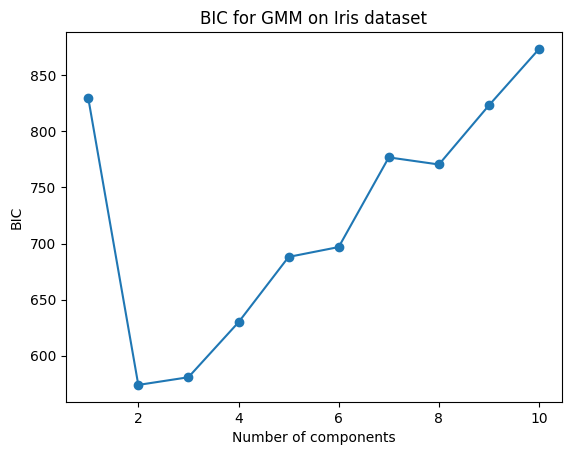

Best number of components according to BIC: 2


True Species,0,1,2
Predicted (3 classes),,,
0,0,45,0
1,50,0,0
2,0,5,50


In [92]:
from sklearn import datasets
from sklearn.mixture import GaussianMixture
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
species = iris.target_names

# Fit Gaussian Mixture Models with 1 to 10 components and compute BIC
bics = [] # Bayesian Information Criterion, BIC = -2log(L) + k log(n), where k is the number of parameters, n is the number of data points and L is the likelihood of the model given the data.
models = []
for n in range(1, 11):
    gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=0)
    gmm.fit(X)
    bics.append(gmm.bic(X))
    models.append(gmm)

# Plot BIC values
plt.plot(range(1, 11), bics, marker='o')
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.title('BIC for GMM on Iris dataset')
plt.show()

# According to BIC, the best model has 2 components
best_n = np.argmin(bics) + 1
print(f"Best number of components according to BIC: {best_n}")

# Fit GMM with 2 components
gmm_best = GaussianMixture(n_components=best_n, covariance_type='full', random_state=0)
gmm_best.fit(X)
labels = gmm_best.predict(X)

# Contingency table between predicted classes and true species
pd.crosstab(labels, y, rownames=['Predicted'], colnames=['True Species'])

# If we force a model with 3 components (as in the R code)
gmm_3 = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
gmm_3.fit(X)
labels_3 = gmm_3.predict(X)

# Contingency table for 3 components
pd.crosstab(labels_3, y, rownames=['Predicted (3 classes)'], colnames=['True Species'])

**END**